## Kondensaaror
Fred Järv

Panin kokku vastava elektriskeemi
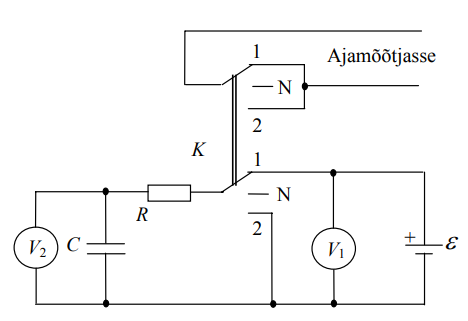





Töötlen kondensaatori pingemõõtmisi ajas. Mõõtmised on tehtud kahe erineva takistiga:
- R2 = 4.55 MΩ
- R1 = 2.63 MΩ

Iga takisti korral on olemas kaks ajas muutuvat pingeseeriat, kondensaatori laadumine (pinge kasvab ajas)ja kondensaatori tühjenemine (pinge kahaneb ajas).

Seega saan kokku neli sõltumatut hinnangut mahtuvusele:  
C(R2, laadumine), C(R2, tühjenemine), C(R1, laadumine), C(R1, tühjenemine).
Need neli tulemust on hiljem võimalik koondada kaalutud keskmiseks.

Kondensaatori mahtuvust saab leida valemi abil 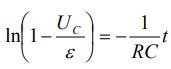


Kuna ma ei ole pythonis eriti oskuslik, siis lasin koodi Chat-GPT-l kirjutada :/

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


In [39]:
# Takistid
R1 = 2630000
R2 = 4550000

# Maksimaalne pinge (kasutan lineaaristamisel)
Umax = 300

# Pinged
U_laad = np.array([0, 50, 75, 100, 125, 150, 175, 200, 225, 250], dtype=float)
U_tühj = np.array([250, 225, 200, 175, 150, 125, 100, 75, 50], dtype=float)

# Ajad R1 ja R2
t1_laad = np.array([0, 5.26, 8.97, 12.23, 15.64, 20.45, 25.77, 32.68, 39.78, 50.91], dtype=float)
t2_laad = np.array([0, 9.19, 14.64, 20.28, 26.53, 33.93, 43.36, 53.84, 66.38, 84.71], dtype=float)

t1_tühj = np.array([0, 3.73, 7.30, 11.77, 16.86, 23.01, 29.96, 38.21, 51.89], dtype=float)
t2_tühj = np.array([0, 5.53, 11.91, 19.35, 27.33, 37.66, 49.18, 63.87, 87.62], dtype=float)

In [40]:
def regressioon(t, y):
    # y = b + k*t
    koef, kov = np.polyfit(t, y, 1, cov=True)
    k, b = float(koef[0]), float(koef[1])
    uk = float(np.sqrt(kov[0, 0]))

    y_hat = k*t + b
    ss_res = float(np.sum((y - y_hat)**2))
    ss_tot = float(np.sum((y - np.mean(y))**2))
    R2 = 1 - ss_res/ss_tot if ss_tot != 0 else np.nan
    return k, b, uk, R2

def C_ja_uC(k, uk, R):
    C = -1.0/(R*k)
    dC_dk = 1.0/(R*(k**2))
    u2 = (dC_dk*uk)**2
    return float(C), float(np.sqrt(u2))

def joonista_punktid(t, U, pealkiri, ylab):
    plt.figure()
    plt.scatter(t, U)
    plt.title(pealkiri)
    plt.xlabel("t")
    plt.ylabel(ylab)
    plt.grid(True)
    plt.show()

def joonista_sirge(t, y, k, b, pealkiri, ylab):
    x = np.linspace(t.min(), t.max(), 200)
    plt.figure()
    plt.scatter(t, y, label="punktid")
    plt.plot(x, k*x + b, label=f"k={k:.4e}")
    plt.title(pealkiri)
    plt.xlabel("t")
    plt.ylabel(ylab)
    plt.grid(True)
    plt.legend()
    plt.show()

def uF(x):
    return x * 1e6

### Regressiooniga leian tõusu k ja selle hajuvuse, sellest arvutan C ja määramatuse.

In [41]:
# y = ln(1 - U/Umax)
y_laad = np.log(1 - U_laad/Umax)

k1L, b1L, uk1L, R2_1L = regressioon(t1_laad, y_laad)
k2L, b2L, uk2L, R2_2L = regressioon(t2_laad, y_laad)

C1L, uC1L = C_ja_uC(k1L, uk1L, R1)
C2L, uC2L = C_ja_uC(k2L, uk2L, R2)

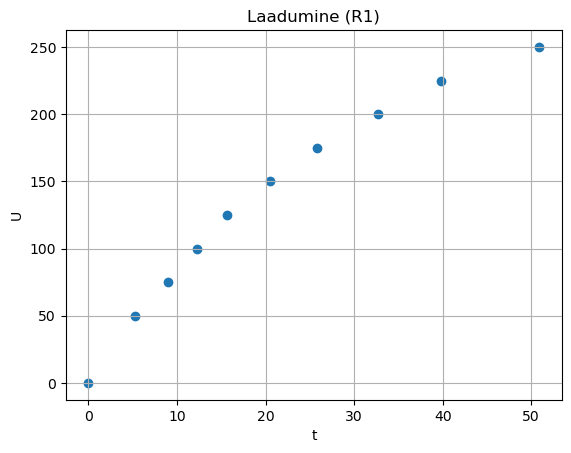

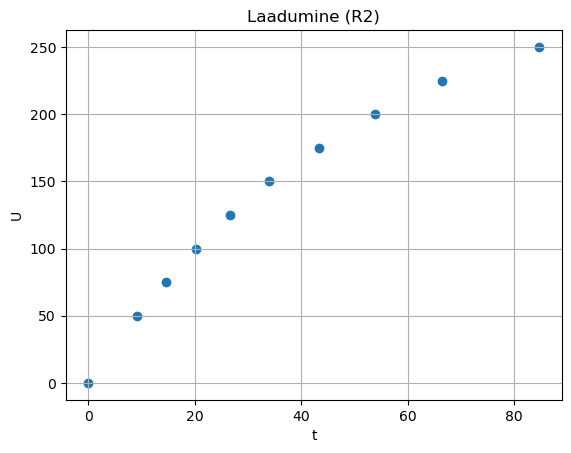

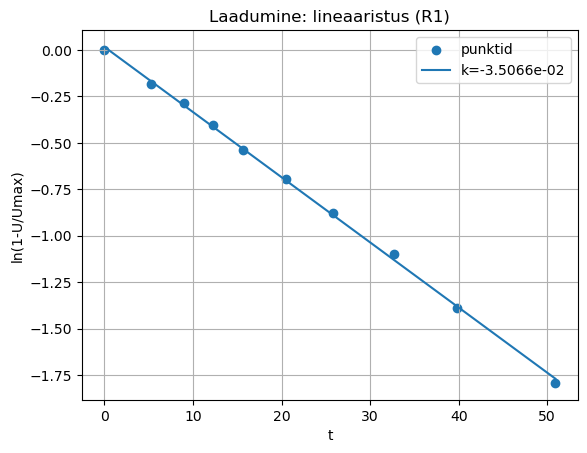

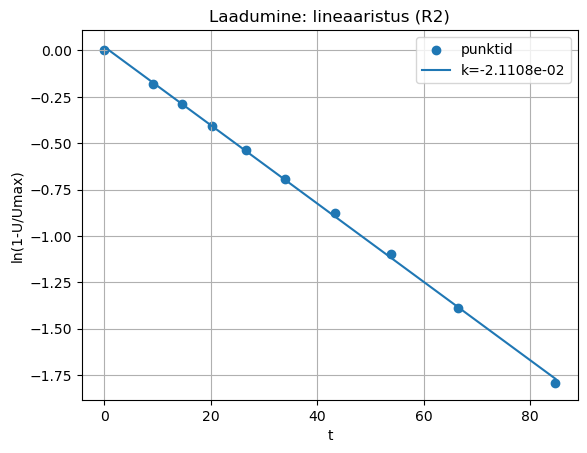

In [42]:
joonista_punktid(t1_laad, U_laad, "Laadumine (R1)", "U")
joonista_punktid(t2_laad, U_laad, "Laadumine (R2)", "U")

joonista_sirge(t1_laad, y_laad, k1L, b1L, "Laadumine: lineaaristus (R1)", "ln(1-U/Umax)")
joonista_sirge(t2_laad, y_laad, k2L, b2L, "Laadumine: lineaaristus (R2)", "ln(1-U/Umax)")

In [43]:
# y = ln(U/U0)
U0 = U_tühj[0]
y_tühj = np.log(U_tühj/U0)

k1T, b1T, uk1T, R2_1T = regressioon(t1_tühj, y_tühj)
k2T, b2T, uk2T, R2_2T = regressioon(t2_tühj, y_tühj)

C1T, uC1T = C_ja_uC(k1T, uk1T, R1)
C2T, uC2T = C_ja_uC(k2T, uk2T, R2)

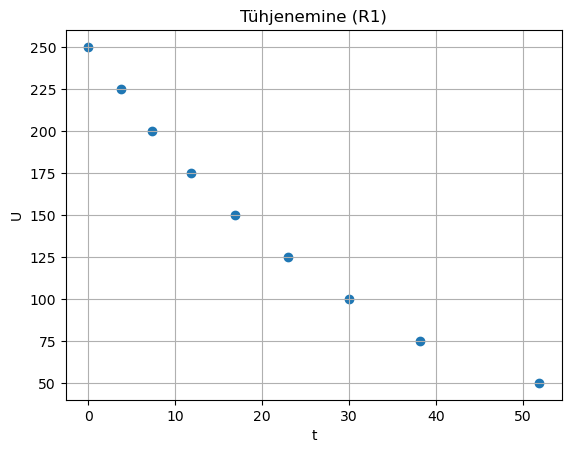

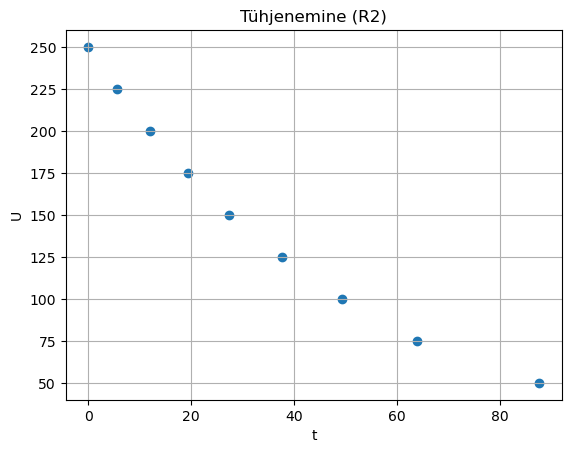

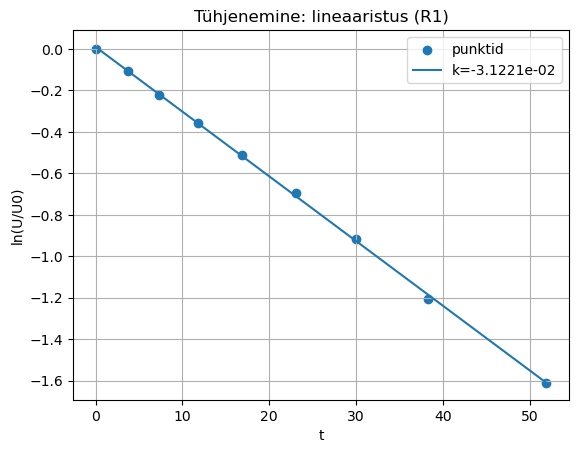

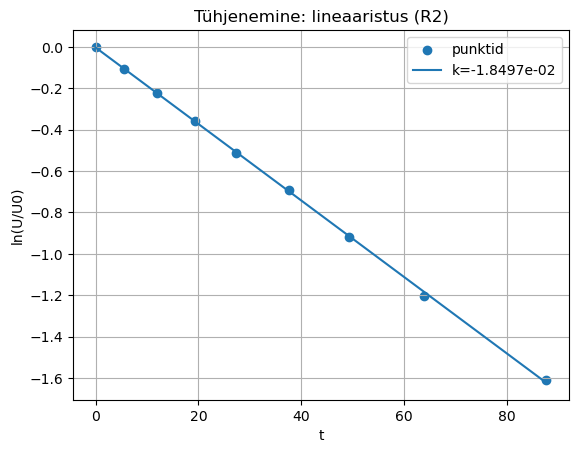

In [44]:
joonista_punktid(t1_tühj, U_tühj, "Tühjenemine (R1)", "U")
joonista_punktid(t2_tühj, U_tühj, "Tühjenemine (R2)", "U")

joonista_sirge(t1_tühj, y_tühj, k1T, b1T, "Tühjenemine: lineaaristus (R1)", "ln(U/U0)")
joonista_sirge(t2_tühj, y_tühj, k2T, b2T, "Tühjenemine: lineaaristus (R2)", "ln(U/U0)")

In [45]:
tabel = pd.DataFrame([
    {"Seeria":"R1 laad", "k": k1L, "R2": R2_1L, "C": uF(C1L), "u": uF(uC1L)},
    {"Seeria":"R2 laad", "k": k2L, "R2": R2_2L, "C": uF(C2L), "u": uF(uC2L)},
    {"Seeria":"R1 tüh",  "k": k1T, "R2": R2_1T, "C": uF(C1T), "u": uF(uC1T)},
    {"Seeria":"R2 tüh",  "k": k2T, "R2": R2_2T, "C": uF(C2T), "u": uF(uC2T)},])

display(tabel)

,Seeria,k,R2,C,u
0,R1 laad,-0.035066,0.999162,10.843283,0.111047
1,R2 laad,-0.021108,0.999386,10.412409,0.091253
2,R1 tüh,-0.031221,0.999602,12.178476,0.091847
3,R2 tüh,-0.018497,0.999708,11.881962,0.076804


### Sellest tabelist on näha, et sirge lineaarsus on väga hea( R**2 on peaegu 1), 

## Kaalutud keskmise määramatus on kasulik, sest seda kasutades saab suurema määramatusega mõõtmeid arvestada väiksema kaaluga, kui väikssema määramatusega.
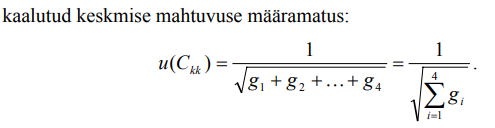
Kus 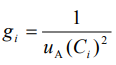

In [50]:
C = tabel["C"].to_numpy()
u = tabel["u"].to_numpy()

g = 1.0/(u**2)
Ckk = float(np.sum(g*C)/np.sum(g))
uCkk = float(np.sqrt(1.0/np.sum(g)))

print(f"C_kk = {Ckk:.2f} ± {uCkk:.2f}  (µF)")

C_kk = 11.42 ± 0.05  (µF)


## Kaalutud keskmine määramatus on C = 11.42 ± 0.05 (µF)

# Küsimused
# 1. Tõestage, et korrutisel RC on aja dimensioon
##    Takistuse ühik on oom Ω=𝑉/𝐴 ja mahtuvuse ühik on farad 𝐹=𝑄/𝑉=𝐴⋅𝑠/𝑉. Seega korrutise 𝑅C dimensioon on 𝑅𝐶=(𝑉/𝐴)⋅(𝐴⋅𝑠/𝑉)=𝑠 ehk 𝑅𝐶 on aja dimensiooniga suurus.
# 2. Kondensaatoripatarei koosneb kahest järjestikku ühendatud kondensaatorist, mille mahtuvused on pF C1 = 300 ja pF C2 = 500 . Patarei pinge on 12 kV. 
## Järjestikku ühendatud kondensaatorite korral on laeng mõlemal kondensaatoril sama 𝑞1=𝑞2=𝑞, ning kogupinge jaguneb 𝑈=𝑈1+𝑈2. Ekvivalentmahtuvus on 𝐶=𝐶1*𝐶2/(𝐶1+𝐶2) = 300⋅500/(300+500) pF = 187.5 pF. Seega on laeng 𝑞 =𝐶*𝑈=187.5⋅10**−12⋅12 000 = 2.25⋅10**−6 C = 2.25 𝜇C. Pinged üksikutel kondensaatoritel 𝑈1=𝑞/𝐶1 = 7.5 kV ja 𝑈2=𝑞/𝐶2 = 4.5 kV, seega 𝑈1=7.5 kV, 𝑈2=4.5 kV ja 𝑞1=𝑞2=2.25𝜇C.
# 3. Kondensaator mahtuvusega 400 pF ühendati läbi 300 kΩ takisti pingeallikaga 500 V. Millise aja möödudes on pinge kondensaatori katetel tõusnud 400 voldini? Kui suur on sel juhul kondensaatori laeng? 
## Kui kondensaator 𝐶=400 pF ühendatakse läbi takisti 𝑅=300 kΩ pingeallikaga 𝑈𝑠=500 V, siis laadumisel kehtib 𝑈(𝑡)=𝑈(1−𝑒−𝑡/(𝑅𝐶)). Tingimusest 𝑈=400 V saame 400/500=1−𝑒−𝑡/(𝑅𝐶), 𝑡=−𝑅𝐶ln⁡(0.2)=𝑅𝐶ln⁡(5). Kuna 𝑅𝐶=300⋅103⋅400⋅10−12=1.2⋅10**−4 s=120 𝜇s, siis 𝑡=120𝜇s⋅ln⁡(5)=120𝜇s⋅1.609=193 𝜇s. Laeng sel hetkel on 𝑞=𝐶𝑈=400⋅10**−12⋅400=1.6⋅10**−7 C=160 nC